In [20]:
# preprocessing_iris.py

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# 1. Load the Iris dataset
def load_data():
    iris = load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names
    
    # Create DataFrame
    df = pd.DataFrame(X, columns=feature_names)
    df['species'] = y
    return df


In [22]:
# 2. Preprocess data
def preprocess_data(df):
    # Check for missing values
    print("Missing values per column:\n", df.isnull().sum())
    
    # Normalize features using Min-Max scaling
    features = df.columns[:-1]  # all except 'species'
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    
    # One-hot encode species with updated argument for OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)
    species_reshaped = df['species'].values.reshape(-1, 1)
    species_encoded = encoder.fit_transform(species_reshaped)
    
    species_encoded_df = pd.DataFrame(species_encoded, columns=encoder.categories_[0])
    df_encoded = pd.concat([df.drop(columns=['species']), species_encoded_df], axis=1)
    
    return df, df_encoded


In [23]:
# 3. Exploration and visualization
def explore_data(df):
    print("\nSummary Statistics:\n")
    print(df.describe())
    
    # Pairplot colored by species
    sns.pairplot(df, hue='species', palette='Set2')
    plt.suptitle('Pairplot of Iris Features', y=1.02)
    plt.savefig("pairplot_iris.png")
    plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.savefig("correlation_heatmap_iris.png")
    plt.show()
    
    # Boxplots to detect outliers
    plt.figure(figsize=(12,8))
    df.boxplot(column=list(df.columns[:-1]))  # <-- Fix here: ensure list of columns
    plt.title("Boxplots of Features")
    plt.savefig("boxplots_iris.png")
    plt.show()

Loaded Iris Dataset with shape: (150, 5)
Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Summary Statistics:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           0.458056    1.000000  
std            0.317599    0.819232  
min            0.000000    0.000000  
25%  

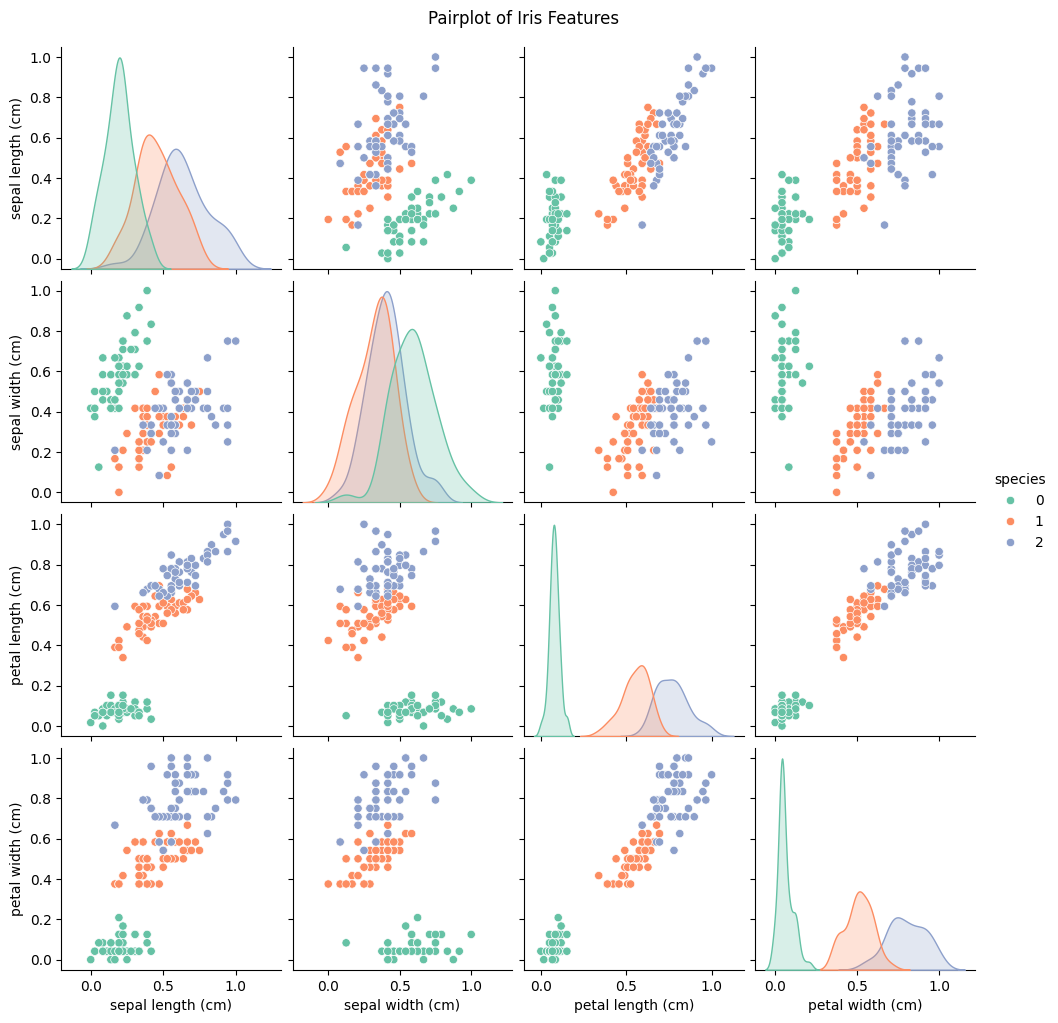

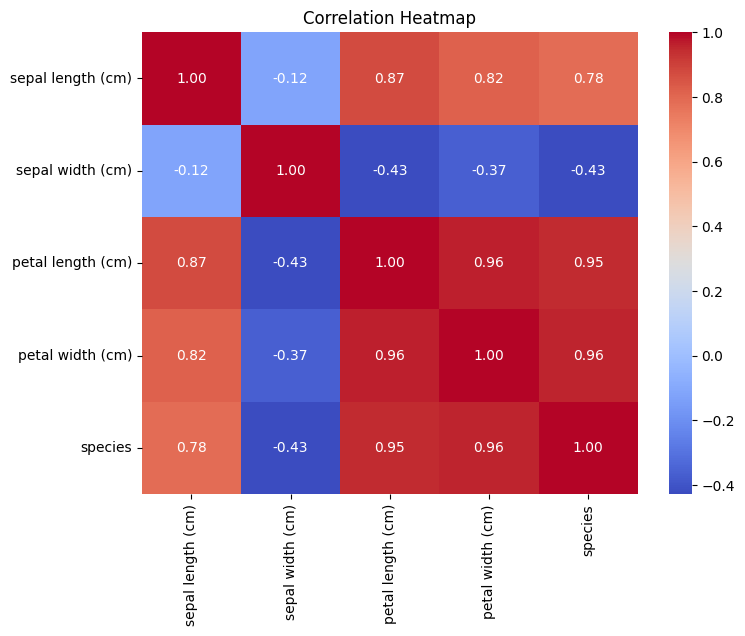

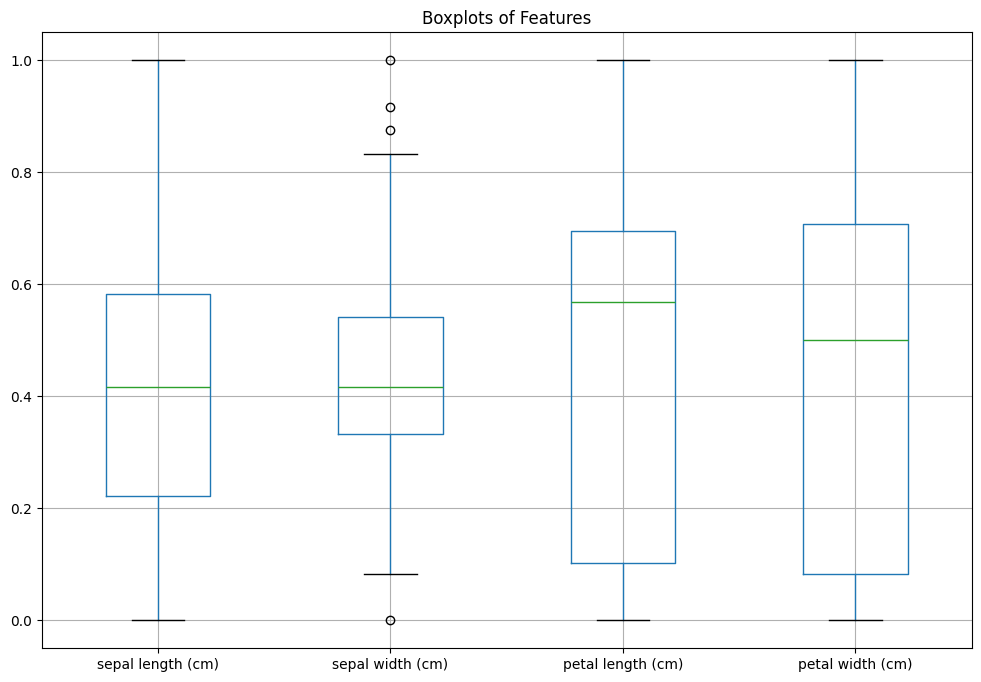


Train set size: 120, Test set size: 30


In [24]:
# 4. Train/test split function
def split_data(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['species'])
    y = df['species']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test

def main():
    df = load_data()
    print("Loaded Iris Dataset with shape:", df.shape)
    
    df_scaled, df_encoded = preprocess_data(df)
    
    explore_data(df)
    
    X_train, X_test, y_train, y_test = split_data(df)
    print(f"\nTrain set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

if __name__ == "__main__":
    main()